In [1]:
# General libraries
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn libraries
from sklearn.model_selection import train_test_split

# Utils functions
from utils.utils import compare_models, plot_score_dist, compare_confidence_intervals

In [2]:
data_folder_path = '../data/'

data_path = data_folder_path + 'complex_processed_data.csv'
standardized_data_path = data_folder_path + 'complex_processed_standardized_data.csv'
standardized_poutliers_removed_data_path = data_folder_path + 'complex_processed_standardized_outliers_removed_data.csv'

df_solubility = pd.read_csv(standardized_data_path)

In [3]:
# Split dataset into X and Y for machine learning

df_sol_X = df_solubility.copy()
df_sol_X.drop(columns=['solubility'], axis=1, inplace=True)

df_sol_y = df_solubility[['solubility']]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
                        df_sol_X, df_sol_y, 
                        train_size = 0.8,
                        test_size = 0.2,
                        random_state = 10
                        )

In [5]:
def load_model(model):
    models_folder = '../models/'
    return joblib.load(models_folder + model + '_model.joblib')

In [6]:
#1000 to 10.000 did not show significative differences
random_state_list = list(np.random.randint(low = 1,high=5000,size=1000))

## Linear Regression VS SVR

mean_score_1 0.00035769795854110107, std 0.10829688506346044
mean_score_2 0.2812319823166273, std 0.06438200163429993
Ttest_relResult(statistic=-82.80593829902732, pvalue=0.0)
P value menor ou igual a 0.05


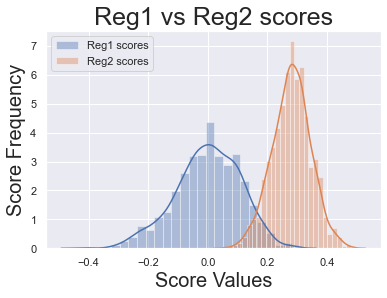

In [7]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)


plot_score_dist(reg1_scores, reg2_scores)

In [8]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.7
)

-0.23263318529768137
0.1954007327775562
0.1478768864965374
0.4130759736425511


## Linear Regression VS XGBoost

mean_score_1 0.00035769795854110107, std 0.10829688506346044
mean_score_2 0.24428285863921223, std 0.059877606878404946
Ttest_relResult(statistic=-96.52284545814338, pvalue=0.0)
P value menor ou igual a 0.05


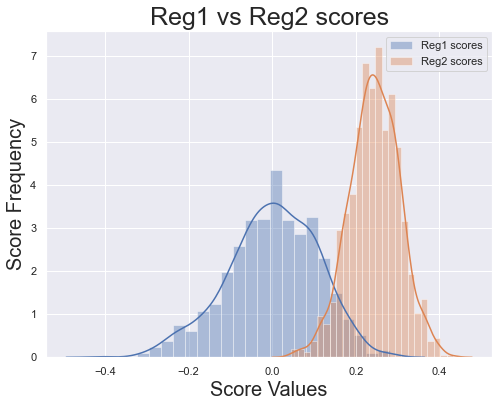

In [9]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores)

In [10]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.7
)

-0.23263318529768137
0.1954007327775562
0.11859755206640225
0.36470212766937377


## SVR VS XGboost

mean_score_1 0.2812319823166273, std 0.06438200163429993
mean_score_2 0.24428285863921223, std 0.059877606878404946
Ttest_relResult(statistic=20.36472035054485, pvalue=2.2053308279663584e-77)
P value menor ou igual a 0.05


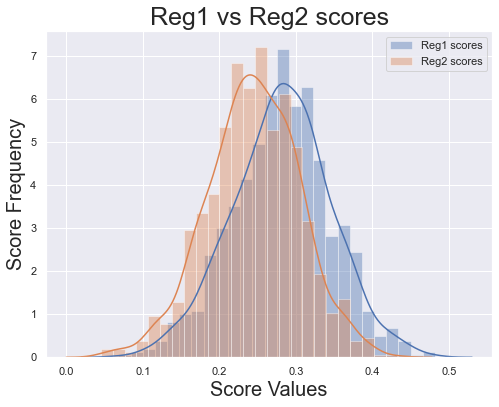

In [11]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores)

In [12]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.7
)

0.1478768864965374
0.4130759736425511
0.11859755206640225
0.36470212766937377


mean_score_1 -0.534666848567201, std 0.13746427375972148
mean_score_2 -0.6135582207433037, std 0.12784678225389165
Ttest_relResult(statistic=20.364720350544843, pvalue=2.2053308279664838e-77)
P value menor ou igual a 0.05


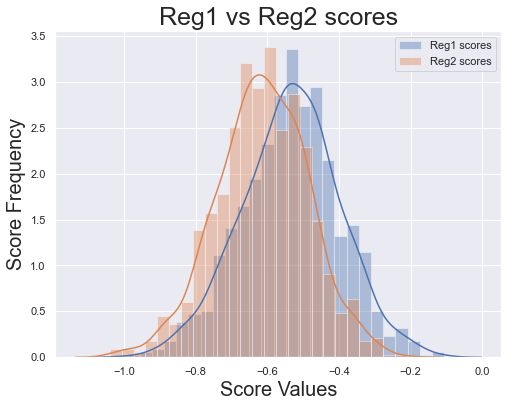

In [13]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    metric="adj_r2",
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores)

In [14]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.7
)

-0.8193979991019875
-0.25316211033076924
-0.8819133347771411
-0.3564468084897156
